In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
import graphviz

# Load the dataset
file_path = "D:\VS\data_transformed.csv"  # Update with the correct path if needed
df = pd.read_csv(file_path)

# Drop non-relevant columns
df_cleaned = df.drop(columns=[
    "Order ID", "Date","Sales Channel ", 
    "ship-service-level", "ship-city", 
    "ship-state", "ship-country"
])

# Define features and target variable
X = df_cleaned.drop(columns=["Category"])
y = df_cleaned["Category"]

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
import graphviz

In [4]:
# Load the dataset
file_path = "D:\VS\data_transformed.csv"  # Update with the correct path if needed
df = pd.read_csv(file_path)

In [5]:
# Drop non-relevant columns
df_cleaned = df.drop(columns=[
    "Order ID", "Date","Sales Channel ", 
    "ship-service-level", "ship-city", 
    "ship-state", "ship-country"
])

In [6]:
# Define features and target variable
X = df_cleaned.drop(columns=["Category"])
y = df_cleaned["Category"]

In [7]:
# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
# Train a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
# Make predictions
y_pred = rf_model.predict(X_test)

In [10]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.7568


In [ ]:
# Visualize a single decision tree
tree = rf_model.estimators_[0]  # Extract one tree from the forest
dot_data = export_graphviz(tree, out_file=None, feature_names=X.columns, 
                           class_names=[str(c) for c in y.unique()],  # Convert categories to strings
                           filled=True, rounded=True, special_characters=True)


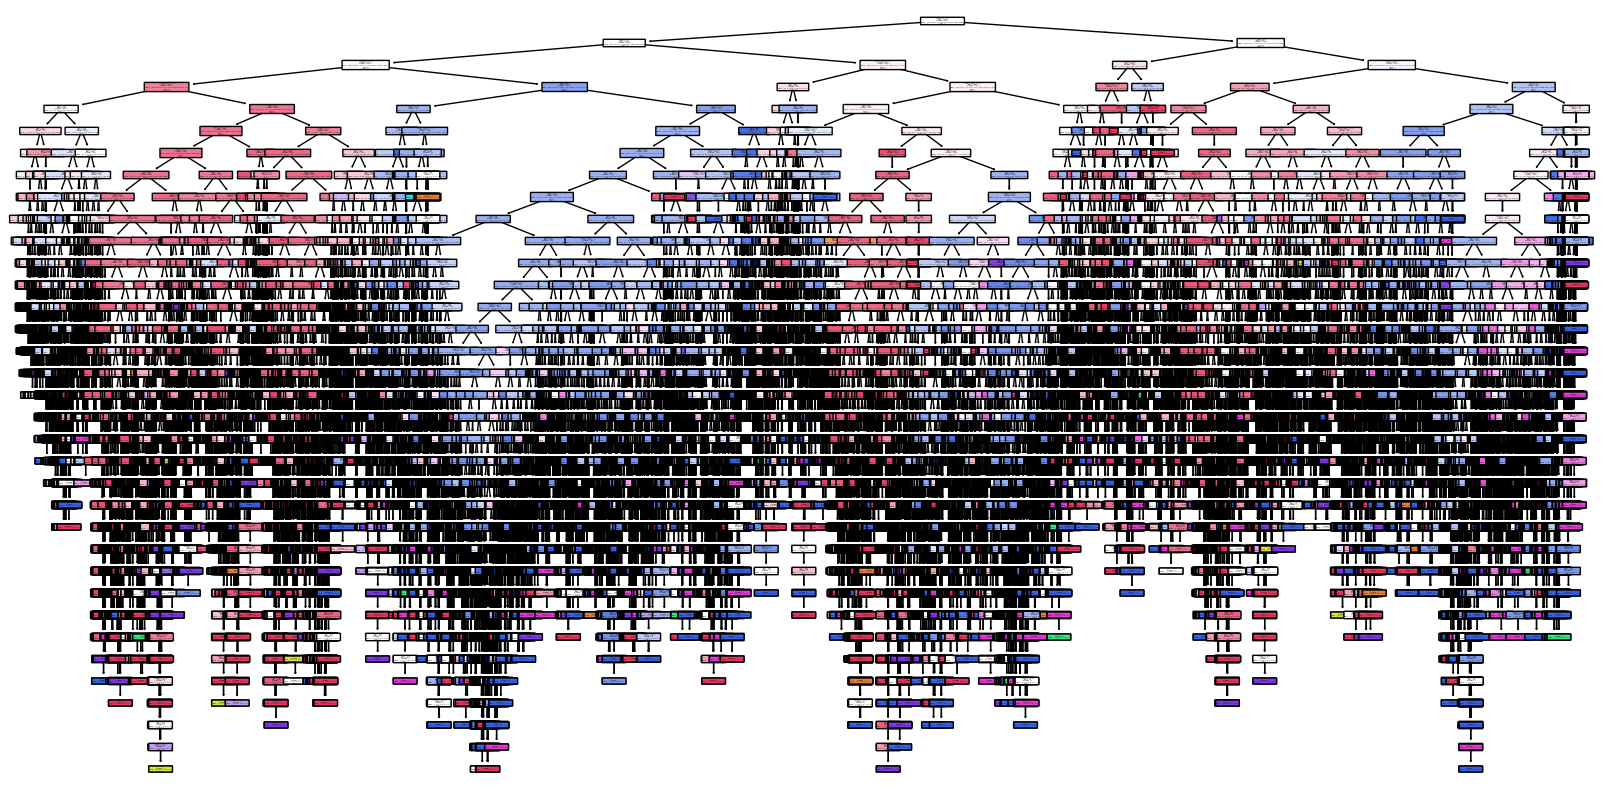

In [15]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Select a single tree from the Random Forest
tree = rf_model.estimators_[0]

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=X.columns, class_names=[str(c) for c in y.unique()], filled=True, rounded=True)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
import graphviz

# Load the dataset
file_path = "D:\VS\data_transformed.csv"  # Update with the correct path if needed
df = pd.read_csv(file_path)

# Drop non-relevant columns
df_cleaned = df.drop(columns=[
    "Order ID", "Date", "Sales Channel ", 
    "ship-service-level", "ship-city", 
    "ship-state", "ship-country","Fulfilment","Courier Status","B2B"
])

# Remove outliers using IQR method
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

df_cleaned = remove_outliers(df_cleaned)

# Define features and target variable
X = df_cleaned.drop(columns=["Category"])
y = df_cleaned["Category"]

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")


Model Accuracy: 0.8001


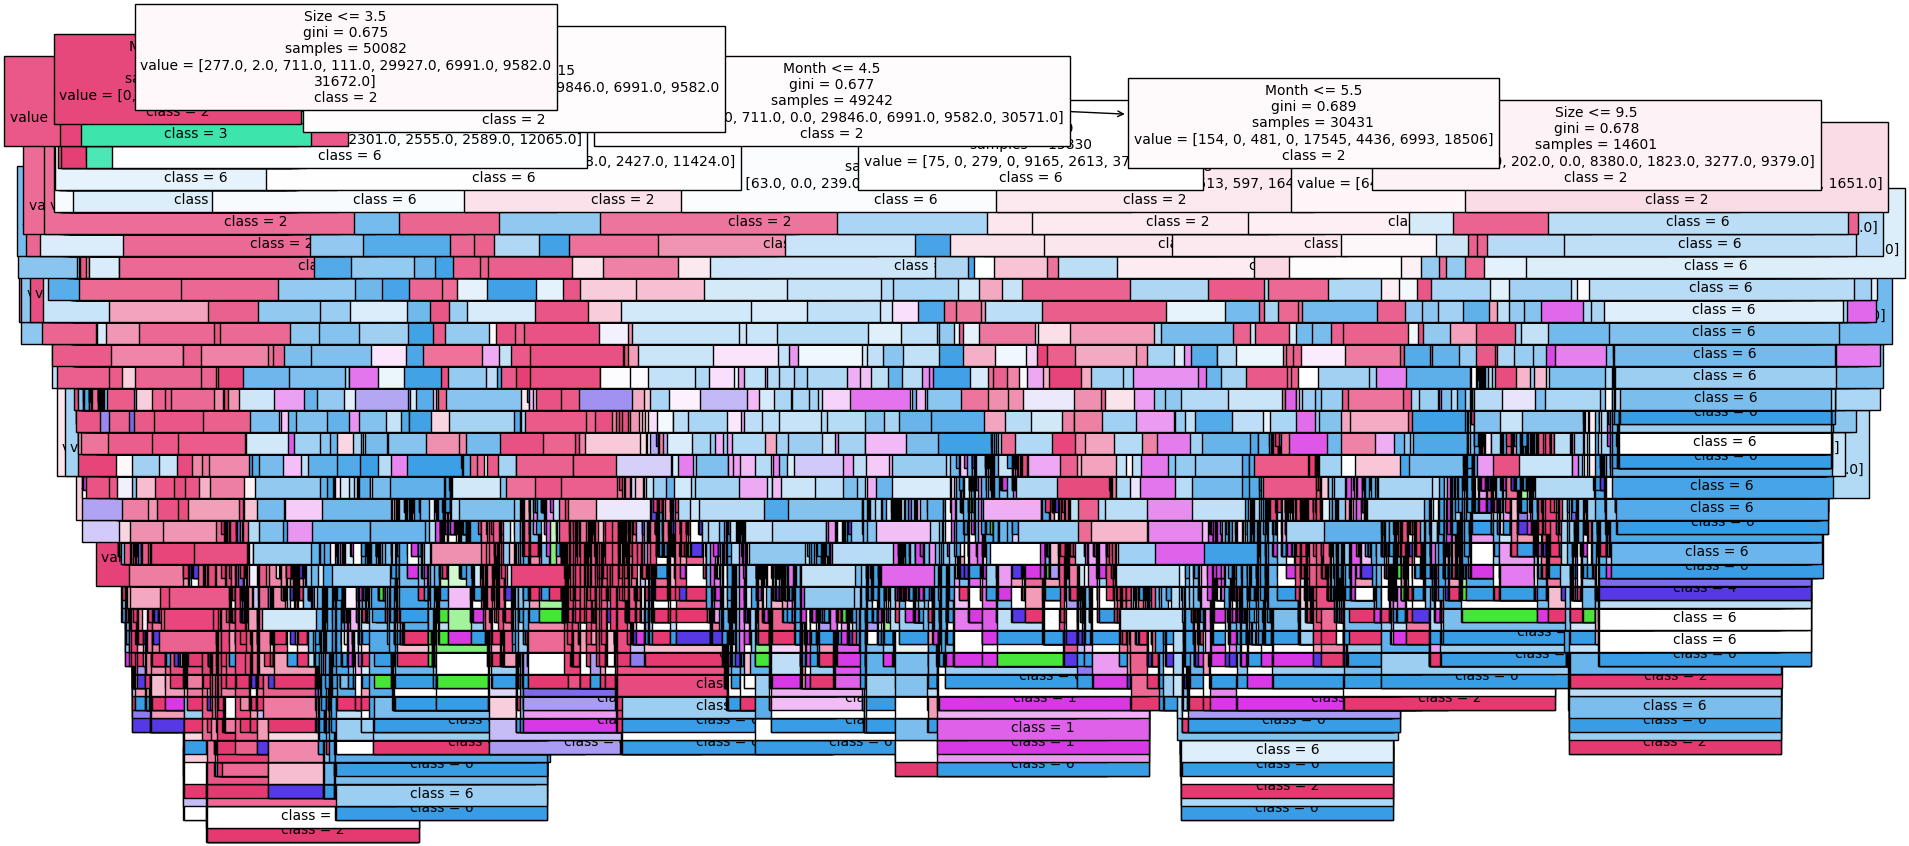

In [25]:
# Generate tree diagram
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0], filled=True, feature_names=X.columns, class_names=y.unique().astype(str), fontsize=10)
plt.show()